> 📌 **Nota de autoría:**  
> Este notebook está basado en el material provisto por el profesor **Matías Barreto**  
> para la materia **Técnicas de Procesamiento de Imágenes** (IFTS N.º 24 – 2025).  
> El contenido fue complementado con explicaciones teóricas, comentarios y recursos adicionales  
> por Cynthia Villagra, con asistencia de herramientas como **ChatGPT** y bibliografía de libre acceso. 

In [13]:
!pip install numpy matplotlib opencv-python -q


You should consider upgrading via the 'c:\users\misse\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [14]:
# Importa NumPy, una librería que permite trabajar con matrices y operaciones matemáticas.
import numpy as np
# Importa la librería OpenCV, que permite trabajar con imágenes y videos.
import cv2
from cv2 import imread
# Importa Matplotlib, usada para mostrar imágenes y gráficos.
import matplotlib.pyplot as plt

In [15]:
%load_ext watermark
%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-04-18T16:37:19.973090-03:00

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 8.18.1

Compiler    : MSC v.1927 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

cv2       : 4.11.0
numpy     : 1.26.4
matplotlib: 3.9.4



## Input

In [16]:
!wget https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
#https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins
#https://opencollection.brooklynmuseum.org/archives/image/51611

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Leer imagenes

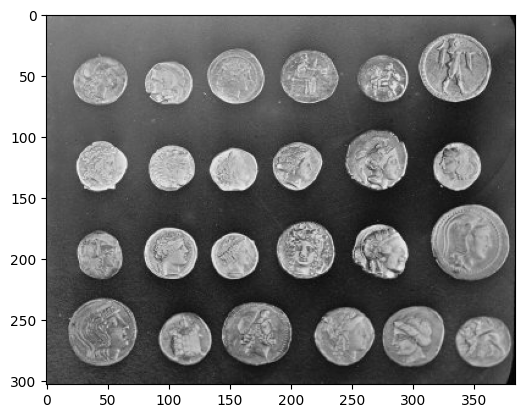

In [17]:
img = imread('S03i3165l01.jpg')
# Muestra la imagen usando Matplotlib.
plt.imshow(img)
# Muestra el gráfico generado.
plt.show()

In [18]:
type(img)

numpy.ndarray

## Funcion

In [19]:
def data_img(img):
# Muestra el tamaño de la imagen en formato (alto, ancho, canales).
  print('Tamaño = ',img.shape)
  print('Max  = ',np.max(img))
  print('Min  = ',np.min(img))

data_img(img)

Tamaño =  (303, 384, 3)
Max  =  252
Min  =  1


## Recortar

### ✂️ ¿Qué significa recortar una imagen?

Recortar una imagen es seleccionar una parte de ella, como si usaras una tijera digital. En términos técnicos, estamos trabajando con **slicing** (rebanado) de matrices.

### 📸 Recordá: una imagen es una matriz

Cuando cargás una imagen con `cv2.imread()`, OpenCV la convierte en una matriz de 3 dimensiones (alto, ancho, color). Por ejemplo:

```python
img = cv2.imread('dog.jpg')
```

- `img.shape` puede dar algo como `(300, 400, 3)`, que significa:
  - 300 filas (alto)
  - 400 columnas (ancho)
  - 3 canales de color (BGR)

---

## 🔍 ¿Cómo se hace el recorte?

```python
img_recorte = img[100:200, 200:300]
```

### Vamos línea por línea:

#### 🔹 `img[...]`
Estamos accediendo a una **subparte** de la imagen original. Esto se hace con dos partes separadas por una coma:

```python
img[filas, columnas]
```

#### 🔹 `100:200`
Este es el rango de **filas** (o sea, el alto de la imagen). Selecciona desde la fila 100 hasta la 199. En Python, el final **no se incluye**, así que `200` no entra.

#### 🔹 `200:300`
Este es el rango de **columnas** (el ancho de la imagen). Selecciona desde la columna 200 hasta la 299.

---

## 🎯 ¿Qué conseguimos con eso?

Estamos tomando un **rectángulo** que:
- Comienza en la fila 100, columna 200.
- Termina en la fila 199, columna 299.
- Mantiene los 3 canales de color.

Es decir, estamos creando una **nueva imagen más chiquita** (de tamaño 100x100) que representa solo una parte de la original.

---

## 🧪 ¿Y cómo lo vemos?

Para mostrar ese recorte correctamente con `matplotlib`, lo convertimos a RGB:

```python
img_recorte_rgb = cv2.cvtColor(img_recorte, cv2.COLOR_BGR2RGB)
plt.imshow(img_recorte_rgb)
plt.axis('off')
plt.show()
```

---

## 🧠 Resumen práctico

| Código                        | ¿Qué hace?                              |
|------------------------------|-----------------------------------------|
| `img[100:200, 200:300]`      | Recorta una porción de la imagen        |
| Primer rango (`100:200`)     | Alto: filas desde la 100 hasta la 199   |
| Segundo rango (`200:300`)    | Ancho: columnas desde la 200 a la 299   |
| Resultado                    | Imagen nueva, más pequeña               |

---

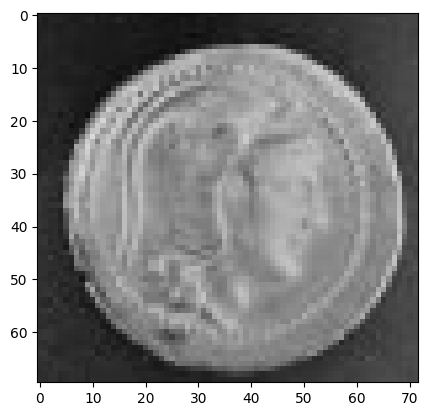

In [20]:
# Primero alto, despues ancho
# Cambia el color del píxel en la posición indicada.
img_cropped = img[150:220, 310:382]
# Muestra la imagen usando Matplotlib.
plt.imshow(img_cropped)

In [21]:
data_img(img_cropped)

Tamaño =  (70, 72, 3)
Max  =  218
Min  =  12


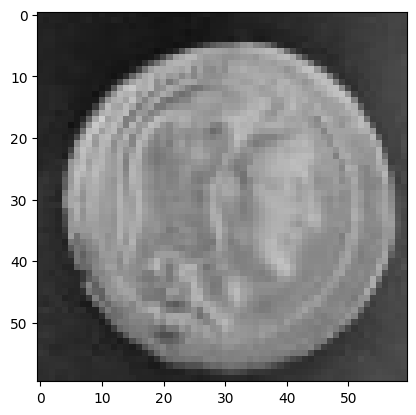

In [22]:
# Primero ancho y despues alto
img_resize = cv2.resize(img_cropped, (60, 60))
# Muestra la imagen usando Matplotlib.
plt.imshow(img_resize)

#Deteccion de bordes con Canny

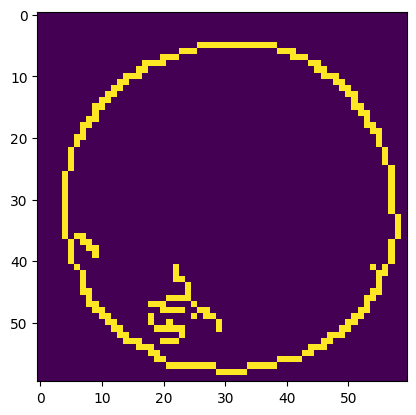

In [23]:
img_canny = cv2.Canny(img_resize, 150, 300)
# Muestra la imagen usando Matplotlib.
plt.imshow(img_canny)

## 🔍 ¿Qué es Canny?

El **algoritmo de Canny** es una técnica que permite **detectar los bordes de una imagen**. Es decir, encuentra las líneas o límites donde **hay un cambio brusco de color o intensidad**.

Por ejemplo: si en una imagen hay un objeto blanco sobre un fondo negro, Canny va a marcar el contorno del objeto.

---

## 🧪 ¿Cómo se aplica en código?

```python
bordes = cv2.Canny(img, 100, 200)
```

---

## ⚙️ ¿Cómo funciona por dentro?

El algoritmo de Canny se compone de **varias etapas**, que te explico paso a paso:

---

### 🧼 1. Reducción de ruido (Filtro Gaussiano)

Antes de buscar bordes, se **suaviza** la imagen para eliminar ruido (pequeñas imperfecciones que podrían confundirse con bordes).

- Se aplica un **filtro gaussiano** (como un desenfoque suave).
- Esto ayuda a no detectar “falsos bordes”.

---

### 📐 2. Cálculo del gradiente

Se calcula el **gradiente de intensidad** de cada píxel. El gradiente es cuánto cambia el color o brillo entre un píxel y sus vecinos.

- Se usan **filtros Sobel** (horizontal y vertical).
- Se obtiene:
  - Magnitud del cambio (`fuerte` o `suave`)
  - Dirección del borde (horizontal, vertical, diagonal...)

---

### ✂️ 3. Supresión no máxima (Non-Maximum Suppression)

Ahora se eliminan los bordes **que no son los más fuertes**.

- Si hay varios píxeles seguidos que parecen ser parte del mismo borde, solo se queda con el más fuerte (el máximo local).
- Esto **afina** los bordes, los hace más delgados y precisos.

---

### 🚦 4. Umbral doble (Double threshold)

Esta parte usa los **dos valores** que vos le pasás en el código:

```python
cv2.Canny(img, 100, 200)
```

- `100`: umbral bajo
- `200`: umbral alto

¿Qué hace?

- Píxeles con valor mayor a 200 → **borde fuerte** ✅
- Píxeles entre 100 y 200 → **borde débil** (depende) 🤔
- Píxeles menores a 100 → **no son borde** ❌

---

### 🧭 5. Seguimiento por histéresis

Finalmente, se decide si los bordes **débiles** se conservan o no:

- Si están conectados a un borde fuerte → se **conservan**
- Si están aislados → se **descartan**

Esto ayuda a **cerrar contornos** y eliminar líneas espurias.

---

## 🧠 ¿Qué conseguimos con Canny?

Una imagen **blanco y negro**, donde:
- Los **bordes detectados** se ven en blanco (`255`)
- El resto está en negro (`0`)

---

## 📌 Parámetros clave

```python
cv2.Canny(imagen, umbral_bajo, umbral_alto)
```

- Elegir los umbrales afecta cuánto detecta:
  - Si son muy bajos → detecta demasiado (incluso ruido)
  - Si son muy altos → detecta poco (solo los bordes muy marcados)

---

## 🧪 ¿Por qué escala de grises?

El algoritmo Canny trabaja con **intensidad**, no con color, por eso se convierte la imagen a grises antes de usarlo.

#Apilado vertical y horizontal

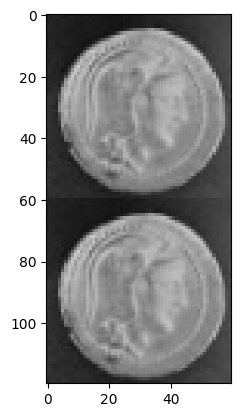

In [24]:
# Apilado vertical
ver = np.vstack((img_resize, img_resize))
# Muestra la imagen usando Matplotlib.
plt.imshow(ver);

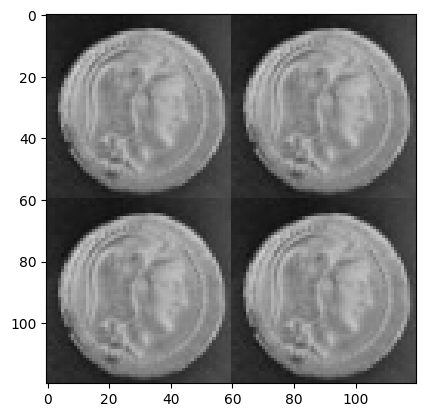

In [25]:
# Apilamos horizontamente dos filas, generando una "matriz" de 2x2
hor2 = np.hstack((ver, ver))
# Muestra la imagen usando Matplotlib.
plt.imshow(hor2);

## Seleccion del primer canal de color

In [26]:
# Cambia el color del píxel en la posición indicada.
X = img_cropped[:,:,0]
data_img(X)

Tamaño =  (70, 72)
Max  =  218
Min  =  12


## 🧩 Línea 1: `X = img_cropped[:, :, 0]`

### 🔍 ¿Qué hace esta línea?

Está **extrayendo un canal de color** de la imagen `img_cropped`.

### 💡 Recordá:

Cuando cargamos una imagen en color (BGR), obtenemos una matriz de 3 dimensiones:

```
[alto, ancho, canal]
```

- `:` significa "todas las filas"
- `:` significa "todas las columnas"
- `0` indica el **primer canal**, que en OpenCV es el canal **azul** (`B` de BGR)

### Entonces:

```python
img_cropped[:, :, 0]
```

→ Devuelve una nueva **matriz 2D** que contiene **solo los valores del color azul** de cada píxel en la imagen recortada (`img_cropped`).

### 🧠 ¿Qué es `X`?

`X` es una matriz de números (enteros entre 0 y 255) que representan **la cantidad de azul** en cada píxel del recorte.

---

## 📊 Línea 2: `data_img(X)`

### 📦 ¿Qué es `data_img`?

Parece ser una **función definida en otra parte del código**, que probablemente:

- Recibe una imagen en forma de matriz (como `X`)
- Muestra esa imagen
- O analiza su contenido de alguna forma

Como no es una función estándar de OpenCV ni de NumPy, probablemente sea una función auxiliar creada por vos o el docente.

---

### 🤖 ¿Qué haría si se trata de mostrar la imagen?

Como `X` es una matriz en escala de grises (solo un canal), esta función tal vez haga algo como esto:

```python
def data_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
```

---

## 📌 ¿Para qué sirve este código?

Este fragmento:
1. **Separa un canal de color** (en este caso, el azul) de una imagen recortada.
2. **Lo visualiza o analiza** por separado.

Esto es útil para estudiar cómo contribuye cada canal de color a la imagen final, o para hacer procesamiento solo sobre un color.

---

## 🎓 Resumen

| Código                         | ¿Qué hace?                                              |
|-------------------------------|----------------------------------------------------------|
| `img_cropped[:, :, 0]`        | Extrae el canal azul de la imagen recortada             |
| `X = ...`                     | Guarda esa matriz en una variable                       |
| `data_img(X)`                 | Llama a una función (probablemente para mostrarla)      |

---


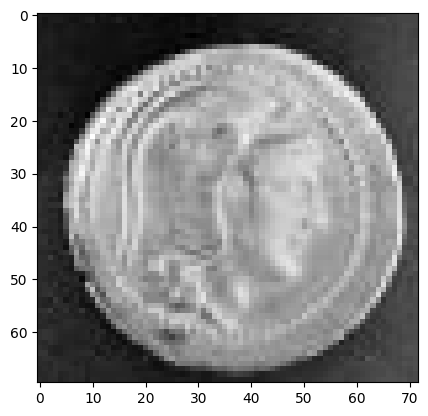

In [27]:
# Muestra la imagen usando Matplotlib.
plt.imshow(X,cmap='gray')
# Muestra el gráfico generado.
plt.show()

In [28]:
# Muestra el valor del píxel en la posición especificada (formato BGR).
img_cropped[1:1]

array([], shape=(0, 72, 3), dtype=uint8)

🔍 ¿Qué hace esto?
Este código intenta acceder a un rango de filas:

1:1 significa: desde la fila 1 hasta la 1, sin incluirla.

Por eso, el resultado es una matriz vacía con shape=(0, 72, 3):

0 filas

72 columnas

3 canales (BGR)

🧠 Conclusión:
No se está accediendo a ningún píxel. Para obtener algo útil, deberías usar por ejemplo img_cropped[1:2].

In [29]:
# Muestra el valor del píxel en la posición especificada (formato BGR).
X[2:2]

array([], shape=(0, 72), dtype=uint8)

🧠 ¿Qué es X?
Probablemente X fue definido antes como un canal individual de la imagen (por ejemplo: el canal azul).

X = img_cropped[:, :, 0] → obtiene sólo el canal azul.

🔍 ¿Qué hace X[2:2]?
Intenta acceder a la fila 2, pero el rango va de 2 hasta 2 sin incluirla.

Resultado: nada. Devuelve una matriz vacía con shape=(0, 72).

In [30]:
pixel1 = (0, 0, 0)
pixel2 = (255,0, 255)
pixel3 = (0, 0, 0)

## 🧠 ¿Qué estamos haciendo acá?

Estamos **creando tres "píxeles" individuales**, o mejor dicho, **simulando el color de tres píxeles**, cada uno representado por una **tupla de 3 valores** en formato **BGR** (azul, verde, rojo), que es el formato que usa OpenCV.

---

## 🎨 ¿Qué color tiene cada uno?

### 🟤 `pixel1 = (0, 0, 0)`
- Azul = 0
- Verde = 0
- Rojo = 0

→ Es **negro**, porque no hay luz en ninguno de los tres canales.

---

### 🟣 `pixel2 = (255, 0, 255)`
- Azul = 255 (máximo)
- Verde = 0
- Rojo = 255 (máximo)

→ Esto forma el color **magenta**:
- Magenta se obtiene cuando mezclás azul y rojo a máxima intensidad, sin verde.

---

### 🟤 `pixel3 = (0, 0, 0)`
- Igual que `pixel1`: **negro**

---


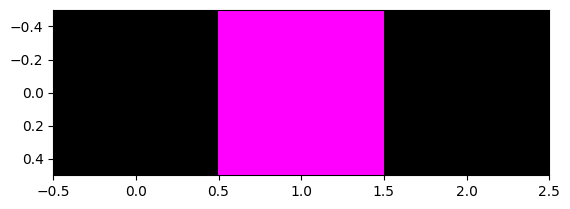

In [31]:
# Muestra la imagen usando Matplotlib.
plt.imshow([[pixel1, pixel2, pixel3]]);

In [32]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/239096.jpg

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [33]:
# Lee la imagen desde un archivo. Devuelve una matriz con los valores de color.
img = cv2.imread('239096.jpg')

In [34]:
type(img)

numpy.ndarray

In [35]:
# Muestra el tamaño de la imagen en formato (alto, ancho, canales).
img.shape

(321, 481, 3)

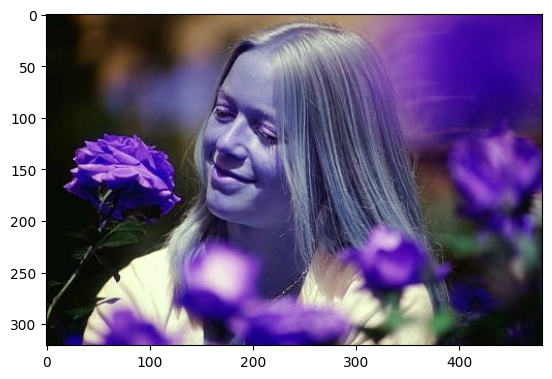

In [36]:
# Muestra la imagen usando Matplotlib.
plt.imshow(img)
# Muestra el gráfico generado.
plt.show()

In [37]:
# Muestra el valor del píxel en la posición especificada (formato BGR).
img[0, 0]

array([ 6, 10,  5], dtype=uint8)

#Convertir BGR a RGB

In [38]:
# Convierte la imagen de BGR (formato de OpenCV) a RGB (formato común).
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [39]:
# Muestra el valor del píxel en la posición especificada (formato BGR).
img_rgb[0, 0]

array([ 5, 10,  6], dtype=uint8)

## 🔍 ¿Qué es esto?

Es un **array de NumPy** que representa un **píxel de una imagen en color**, con tres valores que indican **la intensidad de cada canal de color**.

---

## 📦 ¿Qué representa cada número?

Esto está en formato **BGR** (porque viene de OpenCV):

- `5`   → intensidad del **canal azul** (B)
- `10`  → intensidad del **canal verde** (G)
- `6`   → intensidad del **canal rojo** (R)

> Todos los valores van de `0` (sin color) a `255` (máxima intensidad).

---

## 🎨 ¿Qué color es este píxel?

Con esos valores:

- Azul: muy poco (5)
- Verde: poco (10)
- Rojo: un poco más (6)

➡️ El color es un tono **oscuro, casi negro**, con un leve tinte **verdoso** (porque el verde tiene el valor más alto, aunque sigue siendo bajo).

---

## 🧠 ¿Qué significa `dtype=uint8`?

- `dtype` = tipo de dato.
- `uint8` = **Unsigned INTeger de 8 bits**, o sea:
  - Números enteros entre 0 y 255
  - Usado comúnmente en imágenes, porque cada canal de color va en ese rango.

---

## ✅ Resumen

| Elemento               | Significado                                  |
|------------------------|----------------------------------------------|
| `array([5, 10, 6])`    | Un píxel en formato BGR                      |
| `5` (B)                | Azul muy oscuro                              |
| `10` (G)               | Verde oscuro (el más presente)               |
| `6` (R)                | Rojo muy oscuro                              |
| `dtype=uint8`          | Enteros de 8 bits, valores de 0 a 255        |


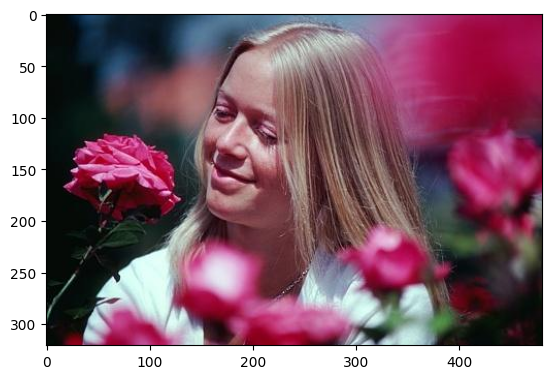

In [40]:
# Muestra la imagen usando Matplotlib.
plt.imshow(img_rgb)
# Muestra el gráfico generado.
plt.show()

#Filtro Gaussiano

## 🎯 ¿Qué hace esta línea?

Esta instrucción **aplica un desenfoque (blur) gaussiano** a una imagen. El objetivo es suavizarla, es decir, **reducir el ruido** o hacer que los detalles pequeños desaparezcan un poco.

---

## 📦 Desglosemos cada parte:

### 🔹 `cv2.GaussianBlur(...)`
Esta es una función de OpenCV que aplica un **filtro gaussiano**, que es un tipo de desenfoque suave y natural, inspirado en cómo se ve algo cuando está fuera de foco.

---

### 🔹 `img_rgb`
Es la **imagen de entrada**. En este caso ya fue convertida a RGB para poder visualizarla bien con `matplotlib`. Pero el desenfoque puede aplicarse a cualquier imagen.

---

### 🔹 `(151, 13)`
Esto es el **tamaño del "kernel"** o máscara del filtro gaussiano.

- `151` es el **ancho** (horizontal)
- `13` es el **alto** (vertical)

👉 Cuanto más grandes sean estos números, **más fuerte será el desenfoque**.  
👉 Estos números **deben ser impares**, porque el centro del kernel tiene que estar bien definido.

🧠 Ejemplo visual: si el kernel fuera una lupa, este valor define qué tan grande es esa lupa.

---

### 🔹 `0` (el último parámetro)

Es el valor de **desviación estándar (`sigma`)** para el filtro gaussiano.

- `0` significa: *dejá que OpenCV lo calcule automáticamente* a partir del tamaño del kernel.

---

## 📸 ¿Qué hace visualmente?

- La imagen se vuelve **borrosa**.
- Los detalles pequeños desaparecen.
- Se usa mucho para:
  - Preprocesamiento antes de detectar bordes
  - Suavizar imágenes ruidosas
  - Efectos artísticos

---

## ✅ ¿Y qué hace exactamente esta línea?

| Parte                         | Significado                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| `cv2.GaussianBlur(...)`      | Aplica un desenfoque suave a la imagen                                     |
| `img_rgb`                    | Imagen sobre la que se aplica el efecto                                    |
| `(151, 13)`                  | Tamaño del kernel: horizontal muy grande, vertical más chico               |
| `0`                          | El sistema calcula automáticamente la dispersión del desenfoque            |
| `img_blur = ...`             | Guarda la imagen desenfocada en una nueva variable                         |


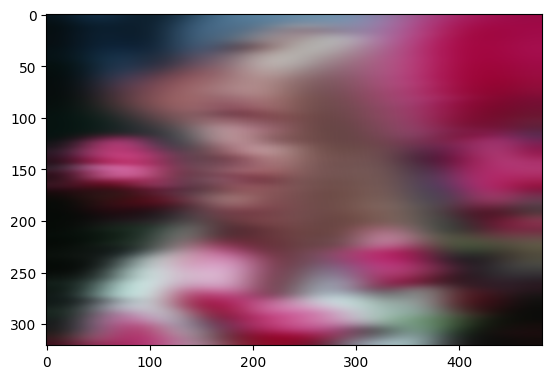

In [41]:
img_blur = cv2.GaussianBlur(img_rgb, (151, 13), 0)
# Muestra la imagen usando Matplotlib.
plt.imshow(img_blur)
# Muestra el gráfico generado.
plt.show()

#Detectar bordes

### 🧩 CELDA 1: Importar la librería `skimage`

```python
import skimage as ski
```

#### ✅ ¿Qué es `skimage`?

`skimage`, o **scikit-image**, es una librería de Python especializada en **procesamiento digital de imágenes**. Incluye funciones para:

- Cargar imágenes
- Aplicar filtros
- Detectar bordes
- Hacer transformaciones geométricas
- Segmentar imágenes, etc.

Acá se importa como `ski` para abreviar su uso.

---

### 🖼️ CELDA 2: Cargar una imagen de ejemplo

```python
image = ski.data.coins()
```

#### ✅ ¿Qué hace esto?

- `ski.data.coins()` carga una **imagen de prueba** que viene incluida en la librería.
- Es una imagen en escala de grises que muestra monedas (coins).
- Se usa frecuentemente para prácticas de segmentación y detección de bordes.

---

### 👁️ CELDA 3: Mostrar la imagen

```python
ski.io.imshow(image)
ski.io.show()
```

#### ✅ ¿Qué pasa acá?

- `imshow(image)` muestra la imagen en pantalla.
- `show()` finaliza y actualiza la visualización (necesario en algunos entornos para que aparezca bien la imagen).

> 🔍 En este punto ves la imagen original (monedas en gris).

---

### ✨ CELDA 4: Aplicar el filtro Sobel para detectar bordes

```python
edges = ski.filters.sobel(image)
ski.io.imshow(edges)
ski.io.show()
```

#### ✅ ¿Qué hace el filtro Sobel?

Aplica una técnica para detectar **bordes** o **cambios bruscos de intensidad** en la imagen.

- El filtro Sobel calcula el **gradiente** de la imagen en direcciones **horizontal y vertical**.
- Cuanto mayor es el cambio de color o brillo entre un píxel y sus vecinos, más fuerte es el borde.

> Esto sirve para **encontrar los contornos** de los objetos (en este caso, las monedas).

#### ✅ ¿Qué es `edges`?

Es una nueva imagen (matriz) donde:
- Los píxeles blancos (valores altos) indican **bordes detectados**
- Los píxeles oscuros (valores bajos) indican zonas sin cambio

---

### 🧠 Resumen de cada paso

| Línea de código                         | ¿Qué hace?                                                             |
|----------------------------------------|------------------------------------------------------------------------|
| `import skimage as ski`                | Importa la librería `scikit-image` con un alias                       |
| `image = ski.data.coins()`             | Carga una imagen de ejemplo (monedas en escala de grises)             |
| `ski.io.imshow(image)`                 | Muestra la imagen original                                            |
| `edges = ski.filters.sobel(image)`     | Aplica el filtro Sobel para detectar los bordes en la imagen          |
| `ski.io.imshow(edges)`                 | Muestra la nueva imagen con los bordes resaltados                     |


In [42]:
import skimage as ski

In [43]:
image = ski.data.coins()

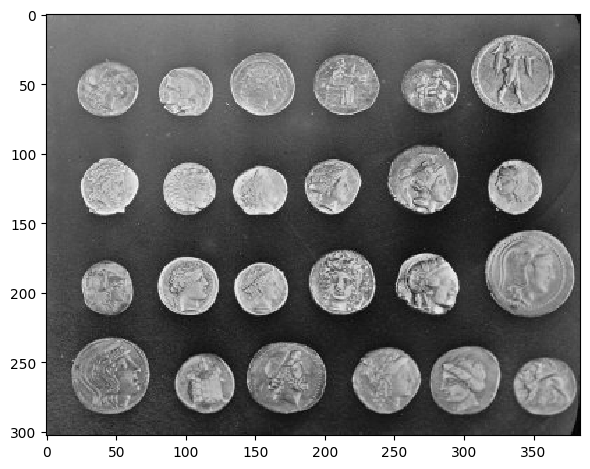

In [44]:
ski.io.imshow(image)
ski.io.show()

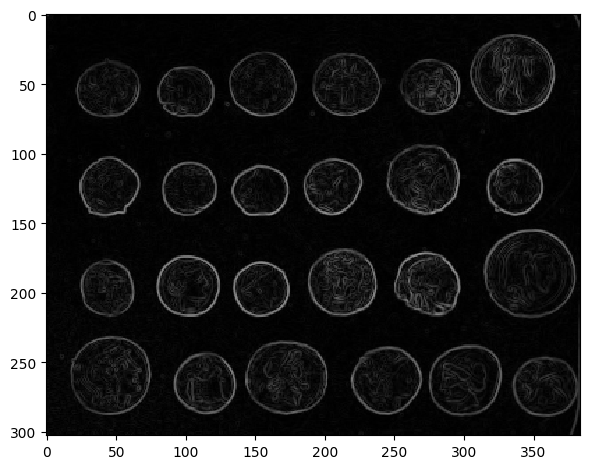

In [45]:
edges = ski.filters.sobel(image)
ski.io.imshow(edges)
ski.io.show()